<center><img src="img/logo_hse_black.jpg"></center>

<h1><center>Data Analysis</center></h1>
<h2><center>Seminar: SVM</center></h2>

In [8]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from tqdm import tqdm_notebook
from sklearn.svm import SVR
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score

%matplotlib inline

plt.style.use('ggplot')
plt.rcParams['figure.figsize'] = (12, 6)

## SVM Classification

Function `select_model` should take train set and output fitted svm model with best hyperparameters.

You should iterate over the following hyperparameters:
- kernel type (linear, RBF, polynomial with different degrees)
- different $C$ ($0.1, 1, 10, 100, 1000, 10000$)

Use 10-fold cross-validation and `GridSearchCV`

In [9]:
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score

In [26]:
def select_model(x, y):
    """
    Implement some model selection strategy here:
    seek through different kernels and parameters.

    Use a validation scheme to select the best model
    
    Quality metric: accuracy

    Returns:
        SVM classifier implemented by sklearn SVC class.
    """
    best_accuracy = 0
    best_model = None
    
    params = [{'kernel': ['linear', 'rbf'],
              'C': [0.1, 1, 10, 100, 1000]},
              {'kernel': ['poly'],
               'C': [0.1, 1, 10, 100, 1000],
               'degree': [2,3]}]
    # Два независимых набора гиперпараметров
    # Для линейного и rbf ядра и для полиномиального
    
    cv = KFold(n_splits=10, shuffle=True, random_state=123)

    model = GridSearchCV(SVC(), params, 
                         scoring='accuracy', 
                         cv=cv)
    
    model.fit(x, y)
    
    best_model = model.best_estimator_
    yhat = best_model.predict(x)
    best_accuracy = accuracy_score(y, yhat)

    print "Best model %s, with accuracy %f" % (best_model, best_accuracy)
    return best_model

Some helper functions

In [27]:
def plot_data_set(x, y, description=''):
    print "Plotting data set points"
    plt.figure(figsize=(8, 8))

    colors = np.array(['r', 'b'])[y]
    plt.title(description, fontsize='small')
    plt.scatter(x[:, 0], x[:, 1], marker='o', c=colors, s=50)
    
def plot_decision_region(x1_min, x2_min, x1_max, x2_max, clf, n_points=1000):
    print "Plotting decision region"
    x1, x2 = np.meshgrid(np.linspace(x1_min, x1_max, n_points), np.linspace(x2_min, x2_max, n_points))
    z = clf.decision_function(np.c_[x1.ravel(), x2.ravel()]).reshape(x1.shape)

    plt.contour(x1, x2, z, levels=[0.0], linestyles='solid', linewidths=2.0)
    plt.contour(x1, x2, z, levels=[-1.0, 1.0], linestyles='dashed', linewidths=1.0)

Generating 'Linearly-separated' data set
Best model SVC(C=100, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='linear',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.990000
Plotting data set points
Plotting decision region


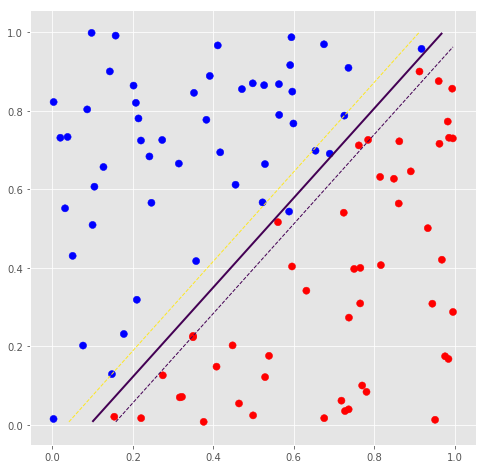

In [28]:
def generate_linear(size=100, k=1.1, b=0.0, nl=0.1):
    print "Generating 'Linearly-separated' data set"

    x = np.random.random((size, 2))
    y = np.zeros(size, dtype=int)
    noise = np.random.randn(size) * nl
    y[x[:, 1] - (k * x[:, 0] + b) > noise] = 1

    return x, y

x, y = generate_linear()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Concentric circles' data set
Best model SVC(C=0.1, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=2, gamma='auto', kernel='poly',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False), with accuracy 0.950000
Plotting data set points
Plotting decision region


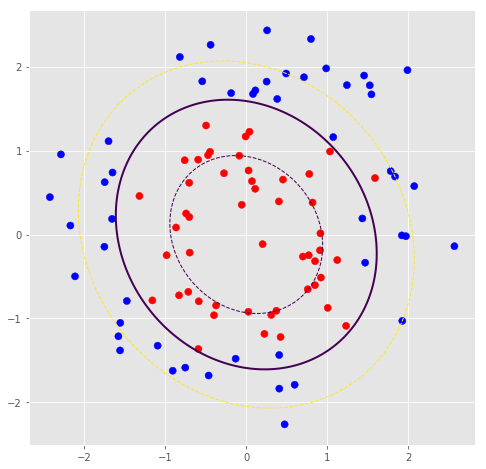

In [29]:
def generate_concentric(size=100, r1=1.0, r2=2.0, sigma=0.3):
    print "Generating 'Concentric circles' data set"
    x = np.zeros((size, 2))
    x[:size/2, 0] = sigma * np.random.randn(size/2) + r1
    x[size/2:, 0] = sigma * np.random.randn(size/2) + r2
    x[:, 1] = (np.random.random(size) - 0.5) * 2 * np.pi
    y = np.hstack([np.zeros(size/2, dtype=int), np.ones(size/2, dtype=int)])

    z = np.zeros((size, 2))
    z[:, 0] = x[:, 0] * np.cos(x[:, 1])
    z[:, 1] = x[:, 0] * np.sin(x[:, 1])

    return z, y

x, y = generate_concentric()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

In [30]:
def generate_sin(size=200):
    print "Generating 'Sinus-separated' data set"

    x = np.random.random((size, 2))
    x[:, 0] = x[:, 0] * 4 * np.pi
    x[:, 1] = (x[:, 1] - 0.5) * 2
    y = np.zeros(size, dtype=int)
    y[x[:, 1] > np.sin(x[:, 0])] = 1

    return x, y

x, y = generate_sin()
clf = select_model(x, y)
plot_data_set(x, y)
plot_decision_region(x[:, 0].min(), x[:, 1].min(), x[:, 0].max(), x[:, 1].max(), clf)

Generating 'Sinus-separated' data set


KeyboardInterrupt: 

## SVM Regression

Consider *titanium.csv*<br/>

We should predict 'y' with 'x'.

### Data visualization

Normalize data (only `x` column) and plot it

In [31]:
df = pd.read_csv('titanium.csv')

In [32]:
df.head()

,x,y
0,585.0,0.644
1,595.0,0.622
2,605.0,0.638
3,615.0,0.649
4,625.0,0.652


In [52]:
df.loc[:, 'x'] = (df.loc[:, 'x'] - df.x.mean())/df.x.std()
# Небольшой методологический косяк
X = df.loc[:, ['x']].values
y = df.loc[:, 'y'].values

In [53]:
X.shape

(49, 1)

In [54]:
y.shape

(49,)

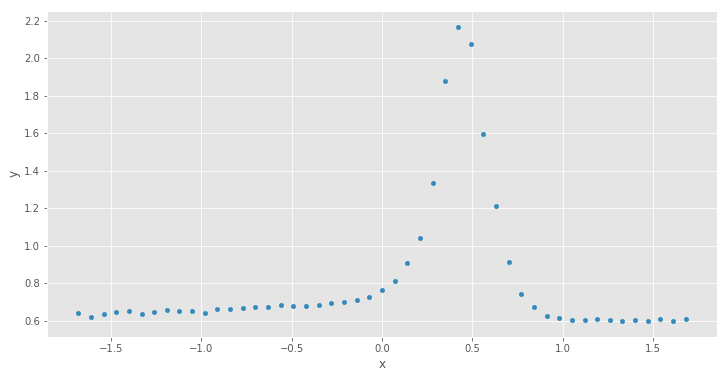

In [55]:
df.plot(x='x', y='y', kind='scatter')

### Model learning

Consider 3 kernels
* Linear
* Polynomial (degree = 3, gamma = 6, coef0 = 1)
* RBF (gamma = 6, coef0 = 1)

Set `epsilon=0.01`

For each kernel:
1. For each `C` in `np.logspace(-2, 2, 10)` find and plot mean absolute error of a model
2. For best `С` at each kernel plot initial dataset with SVM predictions

Everything is performed on training set (no splitting and CV)

In [56]:
from sklearn.metrics import mean_absolute_error

In [57]:
params_list = [
    {'kernel': 'linear'},
    {'kernel': 'poly', 'degree':3, 'gamma':6, 'coef0':1},
    {'kernel': 'rbf', 'gamma': 6, 'coef0': 1}
]
C = np.logspace(-2,2,10)

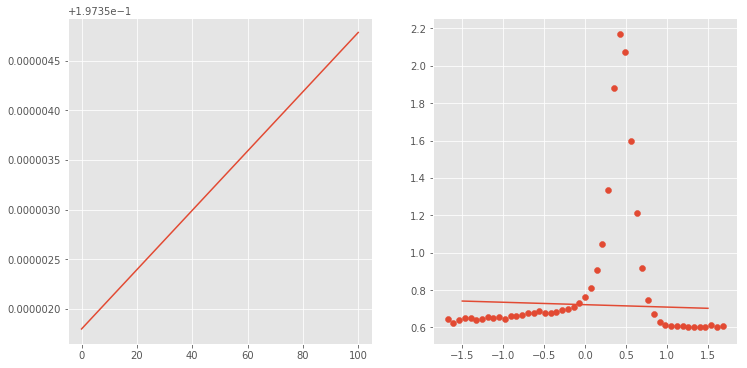

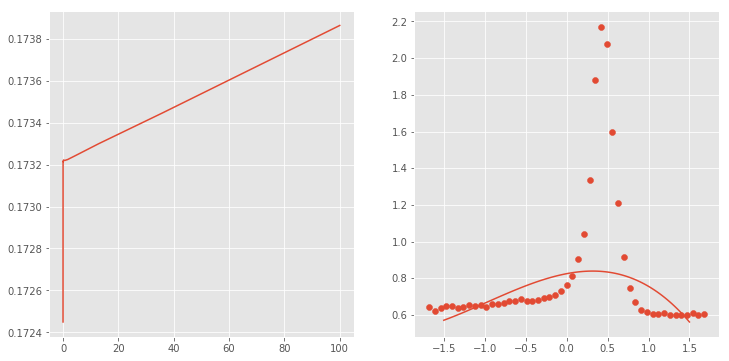

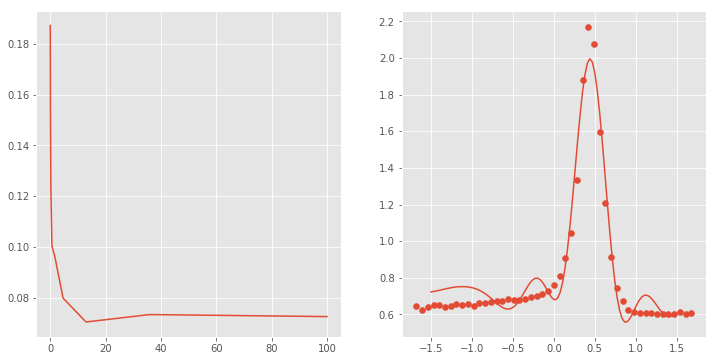

In [58]:
for params in params_list:
    model = SVR(**params)
    scores = []
    for c in C:
        model.set_params(C=c)
        model.fit(X, y)
        
        y_hat = model.predict(X)
        scores.append(mean_absolute_error(y, y_hat))
        
    idx = np.argmin(scores)
    
    c_best = C[idx]
    model.set_params(C=c_best)
    model.fit(X, y)
    
    x_range = np.linspace(-1.5, 1.5, 100).reshape(-1,1)
    y_hat = model.predict(x_range)
    
    fig, ax = plt.subplots(1, 2)
    ax[0].plot(C, scores)
    ax[1].scatter(X, y)
    ax[1].plot(x_range, y_hat)
    

# Custom kernel

Now we are going to try to determinte the language of the word and use custom kernel for that task

We are going to have to texts - some first sentences of War and Peace in spanish and english. Lets say we don't know what ngramms are and consider [edit distance](https://ru.wikipedia.org/wiki/%D0%A0%D0%B0%D1%81%D1%81%D1%82%D0%BE%D1%8F%D0%BD%D0%B8%D0%B5_%D0%9B%D0%B5%D0%B2%D0%B5%D0%BD%D1%88%D1%82%D0%B5%D0%B9%D0%BD%D0%B0) between strings.

In [59]:
def edit_dist(string_1, string_2):
    """
    Calculates the Levenshtein distance between two strings.
    """
    len_1 = len(string_1) + 1
    len_2 = len(string_2) + 1

    d = [0] * (len_1 * len_2)

    for i in range(len_1):
        d[i] = i
    for j in range(len_2):
        d[j * len_1] = j

    for j in range(1, len_2):
        for i in range(1, len_1):
            if string_1[i - 1] == string_2[j - 1]:
                d[i + j * len_1] = d[i - 1 + (j - 1) * len_1]
            else:
                d[i + j * len_1] = min(
                   d[i - 1 + j * len_1] + 1,        # deletion
                   d[i + (j - 1) * len_1] + 1,      # insertion
                   d[i - 1 + (j - 1) * len_1] + 1,  # substitution
                )

    return d[-1]

In [60]:
edit_dist('kitten', 'sitting')

3

## Load and prepare data
Load *war_and_peace_es.txt* and *war_and_peace_en.txt*.<br/> 
Make a single dataframe with a column for word and class label

In [63]:
df_eng = pd.read_csv('war_and_peace_en.txt', header=None, names=['word'])

In [65]:
df_eng.loc[:, 'label'] = 0

In [66]:
df_es = pd.read_csv('war_and_peace_es.txt', header=None, names=['word'])
df_es.loc[:, 'label'] = 1

In [67]:
df = df_eng.append(df_es)

In [68]:
df.shape

(11403, 2)

In [69]:
df.head()

,word,label
0,war,0
1,and,0
2,peace,0
3,leo,0
4,tolstoy,0


## Some data preparations

One issue with custom kernels is that `sklean.SVC` requires them to accept only numbers.<br/>
In our case that should be the indices of words: for instance, instead of strings ['treat', 'celebrit', 'prince', ...] custom kernel should take indices [9209, 11145, 7735, ...].

Before that:
1. Set `RND_SEED`
2. Shuffle and reindex dataframe with words (используйте методы df.sample() и df.reset_index())
3. Limit dataframe up to 1000 words
4. Split to train and test with 60/40

In the end matrices X_train, X_test should contain **indices** of words

In [72]:
from sklearn.model_selection import train_test_split

In [73]:
RND_SEED = 123

In [75]:
df_sample = df.sample(1000, random_state=RND_SEED).reset_index()

In [78]:
X = df_sample.index.values.reshape(-1,1)
y = df_sample.label.values

In [79]:
X.shape

(1000, 1)

In [80]:
X[:10]

array([[0],
       [1],
       [2],
       [3],
       [4],
       [5],
       [6],
       [7],
       [8],
       [9]])

In [99]:
X_train,  X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.4, 
                                                    random_state=RND_SEED)

### Implementation

Some guidence [here](http://stackoverflow.com/questions/26962159/how-to-use-a-custom-svm-kernel).

TD;DR:<br/>
Custom kernel should accept two matrices: $U$ и $V$ with features (during training they both are for training set, during prediction - one for train and one for test set).

As a result it should return a matrix $G_{ij} = K(U_i, V_j)$.

We should:
1. Implement function *string_kernel(U, V)*
2. Visualize it matrix (plt.imshow()).

In [84]:
from scipy.spatial.distance import pdist, squareform
from sklearn.metrics import pairwise_distances

In [ ]:
def string_kernel(U, V):
    G = np.empty((U.shape[0], V.shape[0]))
    # supper ineffective
    for i, u in enumerate(U):
        for j, v in enumerate(V):
            G[i, j] = np.exp(-10*edit_dist(df_sample.loc[int(u),'word'], 
                                        df_sample.loc[int(v),'word'])**2)
    return G

G = string_kernel(X_train, X_train)

In [ ]:
G

In [ ]:
plt.imshow(G)

In [94]:
model = SVC(C=1.0, kernel=string_kernel)

In [100]:
model.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto',
  kernel=<function string_kernel at 0x1a15dea8c0>, max_iter=-1,
  probability=False, random_state=None, shrinking=True, tol=0.001,
  verbose=False)

## Quality estimation

Check quality measure with different `C`

In [ ]:
from sklearn.metrics import accuracy_score

In [ ]:
# Your Code Here